In [1]:
import tensorflow as tf
from tensorflow import keras 
# from skimage import color
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from IPython.display import Image

warnings.filterwarnings('ignore')
%matplotlib inline

2023-12-05 13:18:42.856186: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-05 13:18:42.896308: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-05 13:18:43.671643: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
dataset1_origin = np.load('npz/dataset1_origin.npz', allow_pickle=True)
dataset1_horizon = np.load('npz/dataset1_horizon.npz', allow_pickle=True)
dataset1_vertical = np.load('npz/dataset1_vertical.npz', allow_pickle=True)
dataset1_vh = np.load('npz/dataset1_vh.npz', allow_pickle=True)
dataset2_origin = np.load('npz/dataset2_origin.npz', allow_pickle=True)
dataset2_horizon = np.load('npz/dataset2_horizon.npz', allow_pickle=True)
dataset2_vertical = np.load('npz/dataset2_vertical.npz', allow_pickle=True)
dataset2_vh = np.load('npz/dataset2_vh.npz', allow_pickle=True)

d1o_origin_images, d1o_target_images, d1o_number_labels, d1o_coordinates = dataset1_origin['images'], dataset1_origin['filters'], dataset1_origin['numbers'],  dataset1_origin['coordinates']
d1h_origin_images, d1h_target_images, d1h_number_labels, d1h_coordinates = dataset1_horizon['images'], dataset1_horizon['filters'], dataset1_horizon['numbers'],  dataset1_horizon['coordinates']
d1v_origin_images, d1v_target_images, d1v_number_labels, d1v_coordinates = dataset1_vertical['images'], dataset1_vertical['filters'], dataset1_vertical['numbers'],  dataset1_vertical['coordinates']
d1vh_origin_images, d1vh_target_images, d1vh_number_labels, d1vh_coordinates = dataset1_vh['images'], dataset1_vh['filters'], dataset1_vh['numbers'],  dataset1_vh['coordinates']
d2o_origin_images, d2o_target_images, d2o_number_labels, d2o_coordinates = dataset2_origin['images'], dataset2_origin['filters'], dataset2_origin['numbers'],  dataset2_origin['coordinates']
d2h_origin_images, d2h_target_images, d2h_number_labels, d2h_coordinates = dataset2_horizon['images'], dataset2_horizon['filters'], dataset2_horizon['numbers'],  dataset2_horizon['coordinates']
d2v_origin_images, d2v_target_images, d2v_number_labels, d2v_coordinates = dataset2_vertical['images'], dataset2_vertical['filters'], dataset2_vertical['numbers'],  dataset2_vertical['coordinates']
d2vh_origin_images, d2vh_target_images, d2vh_number_labels, d2vh_coordinates = dataset2_vh['images'], dataset2_vh['filters'], dataset2_vh['numbers'],  dataset2_vh['coordinates']

origin_images = np.concatenate([d1o_origin_images, d2o_origin_images, d1h_origin_images, d2h_origin_images, d1v_origin_images, d2v_origin_images, d1vh_origin_images, d2vh_origin_images], axis = 0)
target_images = np.concatenate([d1o_target_images, d2o_target_images, d1h_target_images, d2h_target_images, d1v_target_images, d2v_target_images, d1vh_target_images, d2vh_target_images], axis = 0)
numbers_labels = np.concatenate([d1o_number_labels, d2o_number_labels, d1h_number_labels, d2h_number_labels, d1v_number_labels, d2v_number_labels, d1vh_number_labels, d2vh_number_labels], axis = 0)
coordinates = np.concatenate([d1o_coordinates, d2o_coordinates, d1h_coordinates, d2h_coordinates, d1v_coordinates, d2v_coordinates, d1vh_coordinates, d2vh_coordinates], axis = 0)

print(origin_images.shape)
print(target_images.shape)
print(numbers_labels.shape)
print(coordinates.shape)


(13276, 24, 32)
(13276, 24, 32)
(13276,)
(13276, 4, 8)


In [3]:
origin_images = origin_images.reshape(13276, 24, 32, 1)
target_images = target_images.reshape(13276, 24, 32, 1)
print(origin_images.shape)
print(target_images.shape)

(13276, 24, 32, 1)
(13276, 24, 32, 1)


In [4]:
print(origin_images.max(), origin_images.min())
print(target_images.max(), target_images.min())

origin_images = origin_images / origin_images.max()
target_images = target_images / target_images.max()

print(origin_images.max(), origin_images.min())
print(target_images.max(), target_images.min())

print(origin_images.shape)
print(target_images.shape)

255 0
255 0
1.0 0.0
1.0 0.0
(13276, 24, 32, 1)
(13276, 24, 32, 1)


In [5]:
from keras.utils import to_categorical

number_labels = to_categorical(numbers_labels, num_classes=5)
print(number_labels.shape)

(13276, 5)


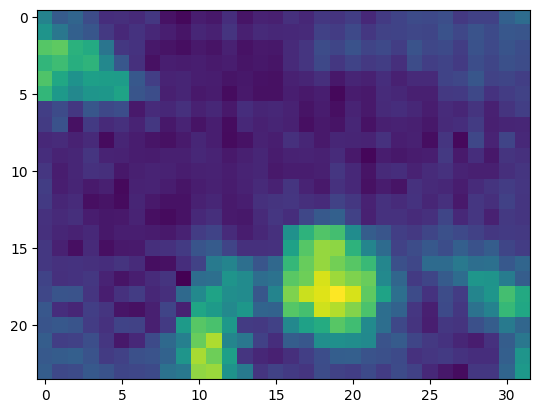

4


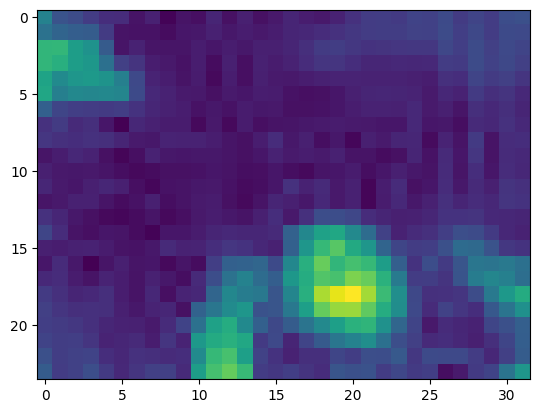

4


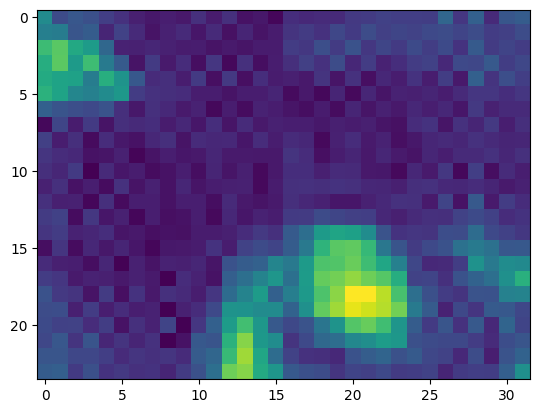

4


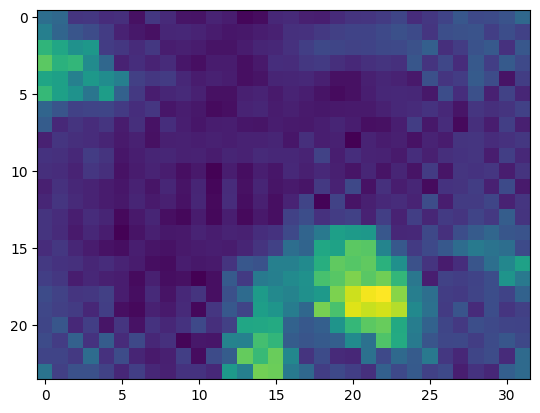

4


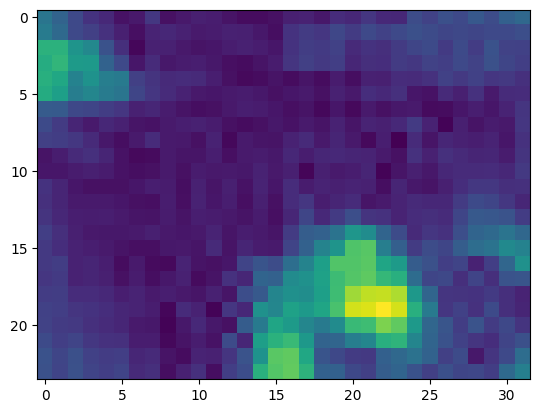

4


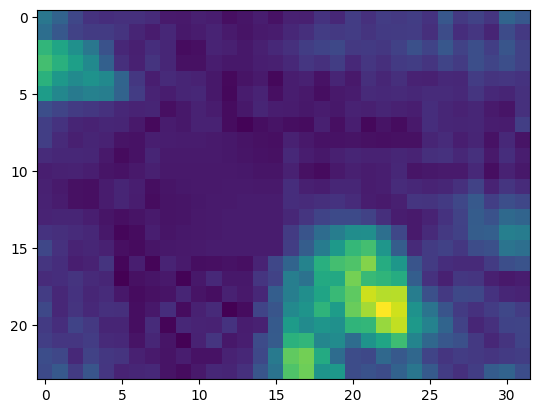

4


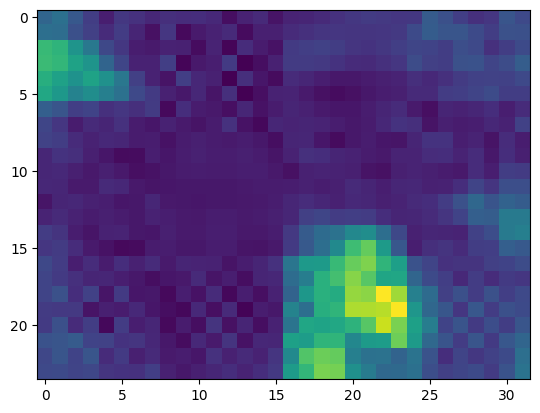

4


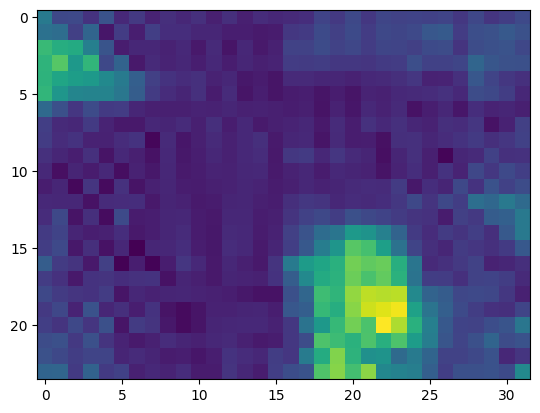

3


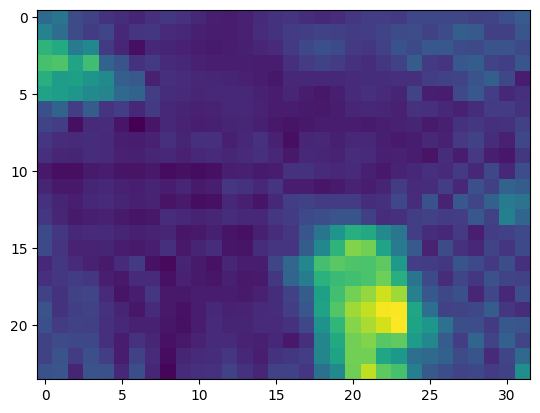

3


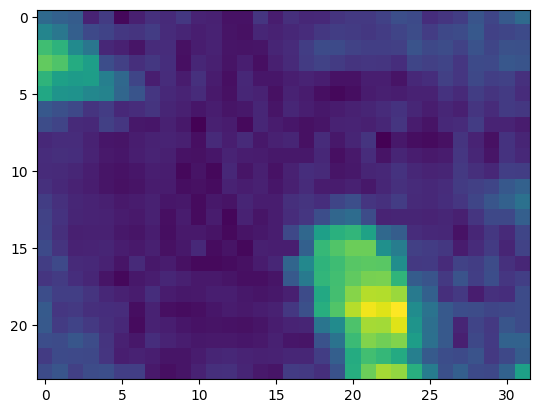

3


In [6]:
for i in range(9000, 9010):
    plt.imshow(origin_images[i])
    plt.show()
    print(numbers_labels[i])


In [7]:
print(number_labels[9000:9010])

[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]]


In [8]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from IPython.display import Image

warnings.filterwarnings('ignore')
from keras.layers import Dense, Input, MaxPool2D, Conv2D, Conv2DTranspose, Flatten, Reshape, Activation
from keras.layers import BatchNormalization, Dropout, Activation, concatenate
from keras.models import Model
from keras.layers import GRU, Concatenate, MaxPooling2D
from keras.models import Model
from keras.layers import Multiply
from keras.layers import MultiHeadAttention

# strategy = tf.distribute.MirroredStrategy()

# print('Number of devices: {}'.format(strategy.num_replicas_in_sync))

from tensorflow.keras.layers import DepthwiseConv2D, Conv2D, MaxPooling2D, concatenate

from keras.layers import ZeroPadding2D

def STMModel():
    # 이미지 입력
    # input_layer = Input(shape=(None, None, 1))
    inputs_image = Input(shape=(24, 32, 1))

    x1 = Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same')(inputs_image)

    # 두 번째 컨볼루션 레이어
    x2 = Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same')(x1)

    # 세 번째 컨볼루션 레이어
    x3 = Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same')(x2)

    # 분류를 위한 완전 연결 레이어
    latent = keras.layers.GlobalAveragePooling2D()(x3)
    latent= Dense(128, activation='relu', dtype = 'float32')(latent)
    latent= Dense(64, activation='relu', dtype = 'float32')(latent)
    latent = Dropout(0.5)(latent)

    number_output = Dense(5, activation='softmax', name='number_output', dtype = 'float32')(latent)
    
    model2 = Model(inputs_image, number_output)
    model2.compile(optimizer='adam', loss=['categorical_crossentropy'], metrics=['accuracy'])
    return model2


model2 = STMModel()
model2.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 24, 32, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 24, 32, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 32, 16)        2320      
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 32, 16)        2320      
                                                                 
 global_average_pooling2d (  (None, 16)                0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               2176      
                                                             

2023-12-05 13:18:50.463707: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 208 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:1d:00.0, compute capability: 8.6
2023-12-05 13:18:50.466564: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 21853 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:1f:00.0, compute capability: 8.6
2023-12-05 13:18:50.468865: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 21853 MB memory:  -> device: 2, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:20:00.0, compute capability: 8.6
2023-12-05 13:18:50.471167: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 21853 MB memory:  -> device: 3, name: NVIDIA GeForce RTX 3090, 

In [9]:
N_BATCH = 128
hist = model2.fit(
    origin_images, number_labels,
    epochs=300,
    batch_size= N_BATCH,
    verbose=1,  # 사용자 정의 콜백 추가
)

Epoch 1/300


2023-12-05 13:18:52.276452: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:437] Could not create cudnn handle: CUDNN_STATUS_NOT_INITIALIZED
2023-12-05 13:18:52.276536: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:441] Memory usage: 10027008 bytes free, 25447170048 bytes total.
2023-12-05 13:18:52.277040: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:451] Possibly insufficient driver version: 470.182.3
2023-12-05 13:18:52.277072: W tensorflow/core/framework/op_kernel.cc:1828] OP_REQUIRES failed at conv_ops_fused_impl.h:625 : UNIMPLEMENTED: DNN library is not found.


UnimplementedError: Graph execution error:

Detected at node 'model/conv2d/Relu' defined at (most recent call last):
    File "/home/gpuadmin/anaconda3/envs/ssd/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/gpuadmin/anaconda3/envs/ssd/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/gpuadmin/anaconda3/envs/ssd/lib/python3.8/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/gpuadmin/anaconda3/envs/ssd/lib/python3.8/site-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/home/gpuadmin/anaconda3/envs/ssd/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 736, in start
      self.io_loop.start()
    File "/home/gpuadmin/anaconda3/envs/ssd/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/home/gpuadmin/anaconda3/envs/ssd/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/home/gpuadmin/anaconda3/envs/ssd/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/home/gpuadmin/anaconda3/envs/ssd/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/home/gpuadmin/anaconda3/envs/ssd/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "/home/gpuadmin/anaconda3/envs/ssd/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "/home/gpuadmin/anaconda3/envs/ssd/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell
      await result
    File "/home/gpuadmin/anaconda3/envs/ssd/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "/home/gpuadmin/anaconda3/envs/ssd/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/home/gpuadmin/anaconda3/envs/ssd/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 546, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/gpuadmin/anaconda3/envs/ssd/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "/home/gpuadmin/anaconda3/envs/ssd/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "/home/gpuadmin/anaconda3/envs/ssd/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/gpuadmin/anaconda3/envs/ssd/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/gpuadmin/anaconda3/envs/ssd/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/gpuadmin/anaconda3/envs/ssd/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_15802/1766539733.py", line 2, in <module>
      hist = model2.fit(
    File "/home/gpuadmin/anaconda3/envs/ssd/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/gpuadmin/anaconda3/envs/ssd/lib/python3.8/site-packages/keras/src/engine/training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/gpuadmin/anaconda3/envs/ssd/lib/python3.8/site-packages/keras/src/engine/training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "/home/gpuadmin/anaconda3/envs/ssd/lib/python3.8/site-packages/keras/src/engine/training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/gpuadmin/anaconda3/envs/ssd/lib/python3.8/site-packages/keras/src/engine/training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "/home/gpuadmin/anaconda3/envs/ssd/lib/python3.8/site-packages/keras/src/engine/training.py", line 1080, in train_step
      y_pred = self(x, training=True)
    File "/home/gpuadmin/anaconda3/envs/ssd/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/gpuadmin/anaconda3/envs/ssd/lib/python3.8/site-packages/keras/src/engine/training.py", line 569, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/gpuadmin/anaconda3/envs/ssd/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/gpuadmin/anaconda3/envs/ssd/lib/python3.8/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/gpuadmin/anaconda3/envs/ssd/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/gpuadmin/anaconda3/envs/ssd/lib/python3.8/site-packages/keras/src/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/gpuadmin/anaconda3/envs/ssd/lib/python3.8/site-packages/keras/src/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/gpuadmin/anaconda3/envs/ssd/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/gpuadmin/anaconda3/envs/ssd/lib/python3.8/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/gpuadmin/anaconda3/envs/ssd/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/gpuadmin/anaconda3/envs/ssd/lib/python3.8/site-packages/keras/src/layers/convolutional/base_conv.py", line 321, in call
      return self.activation(outputs)
    File "/home/gpuadmin/anaconda3/envs/ssd/lib/python3.8/site-packages/keras/src/activations.py", line 321, in relu
      return backend.relu(
    File "/home/gpuadmin/anaconda3/envs/ssd/lib/python3.8/site-packages/keras/src/backend.py", line 5397, in relu
      x = tf.nn.relu(x)
Node: 'model/conv2d/Relu'
DNN library is not found.
	 [[{{node model/conv2d/Relu}}]] [Op:__inference_train_function_1627]

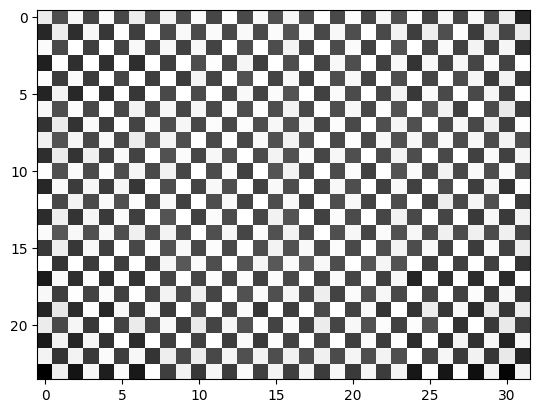

[1. 0. 0. 0. 0.]


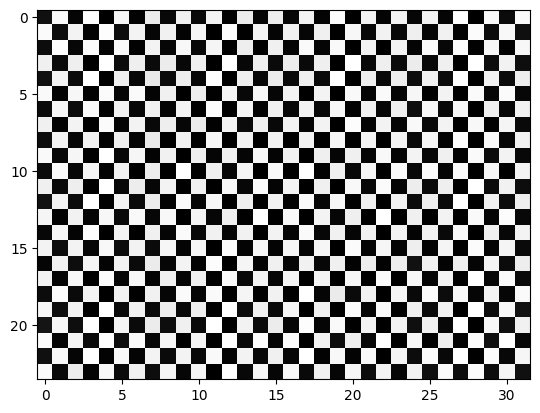

[1. 0. 0. 0. 0.]


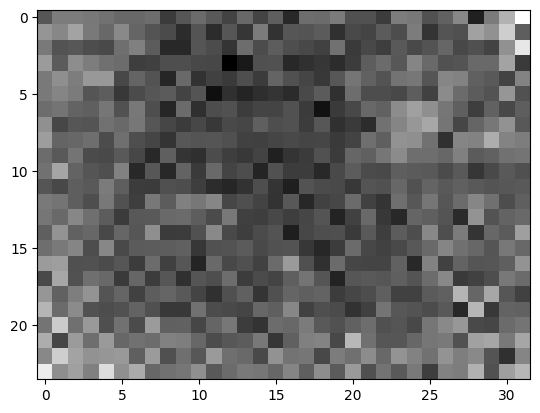

[1. 0. 0. 0. 0.]


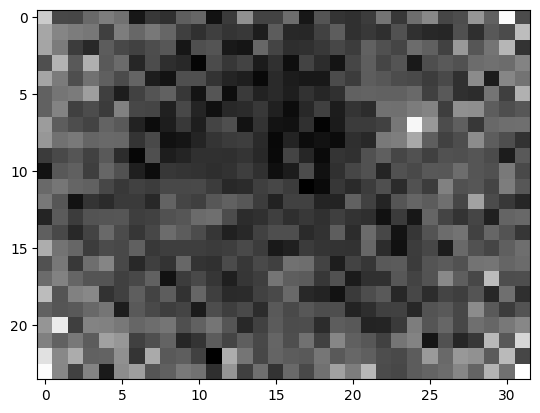

[1. 0. 0. 0. 0.]


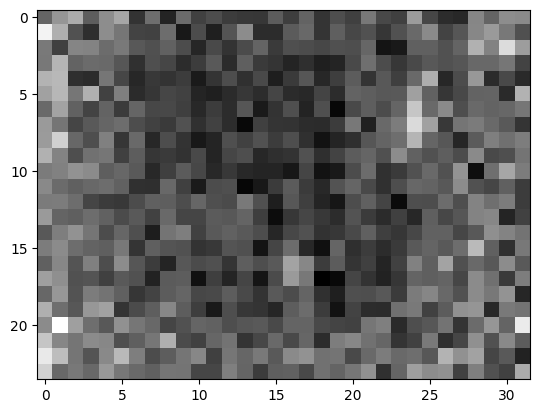

[1. 0. 0. 0. 0.]


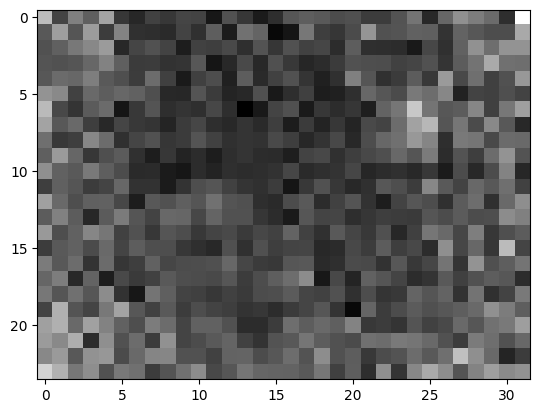

[1. 0. 0. 0. 0.]


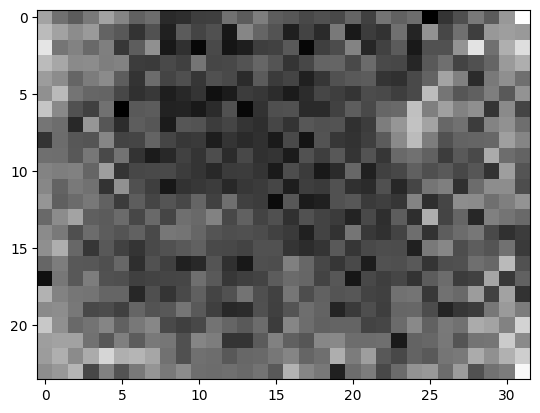

[1. 0. 0. 0. 0.]


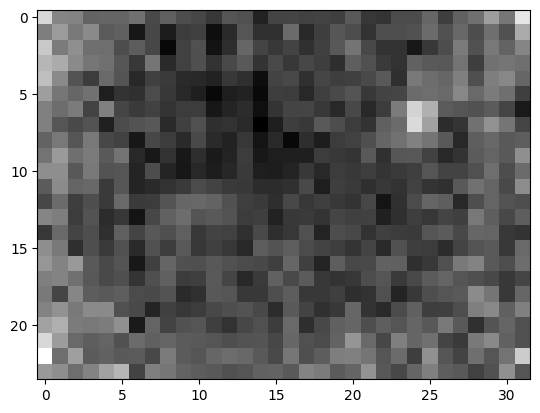

[1. 0. 0. 0. 0.]


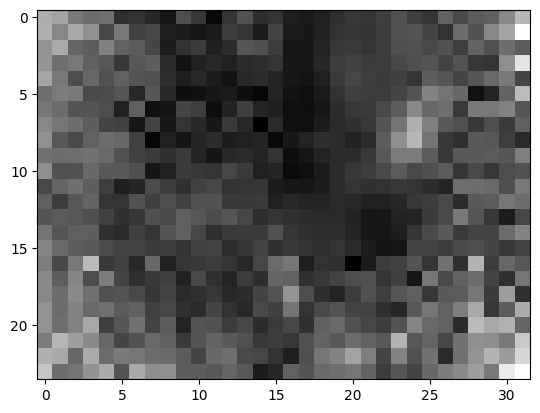

[1. 0. 0. 0. 0.]


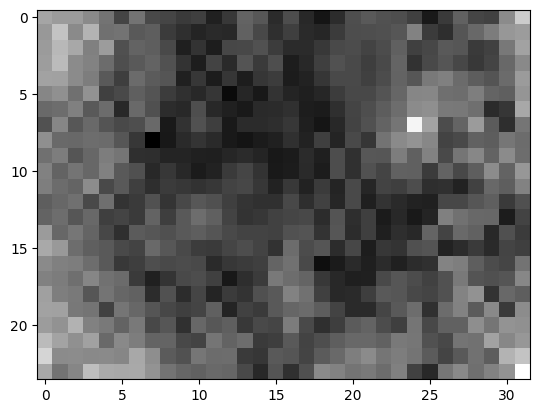

[1. 0. 0. 0. 0.]


In [ ]:
for i in range(10):
    plt.imshow(origin_images[i], cmap='gray')
    plt.show()
    print(number_labels[i])

In [ ]:
model2.save('./v2_1.h5')
print(origin_images.shape, number_labels.shape)

(13276, 24, 32, 1) (13276, 5)


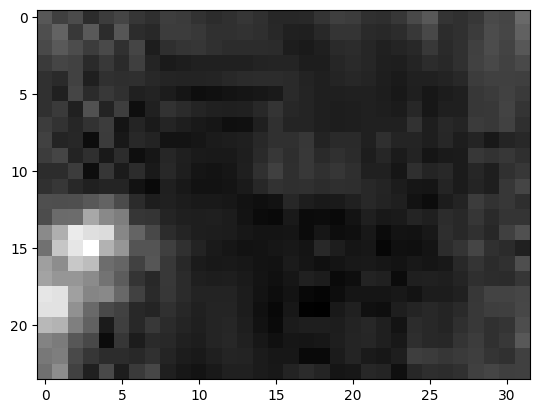

1/1 [==============================] - 0s 121ms/step
2


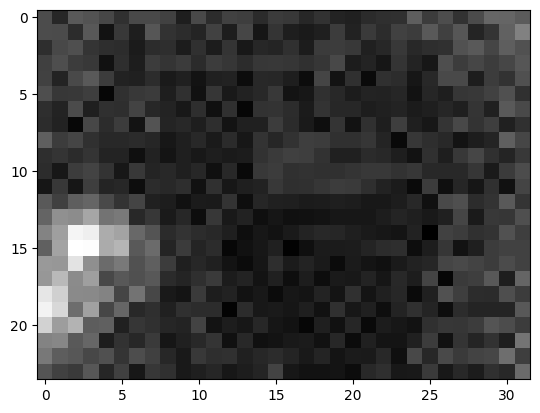

1/1 [==============================] - 0s 27ms/step
2


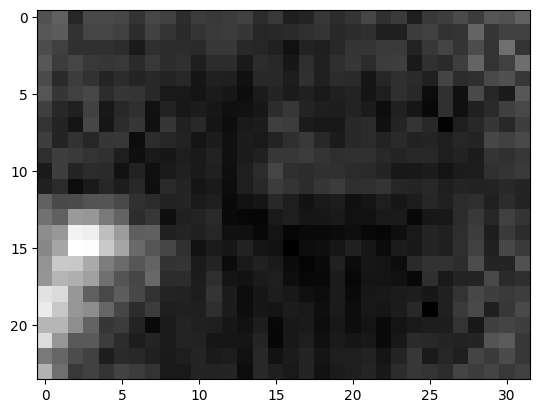

1/1 [==============================] - 0s 27ms/step
2


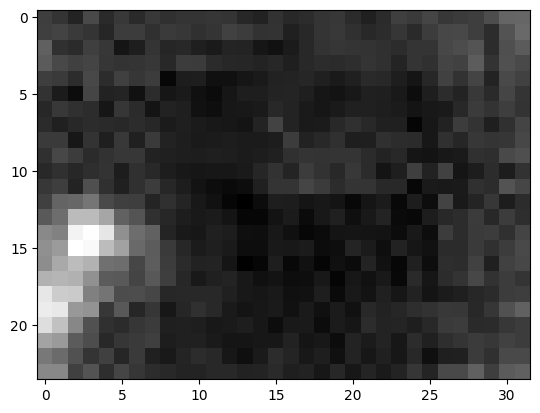

1/1 [==============================] - 0s 27ms/step
2


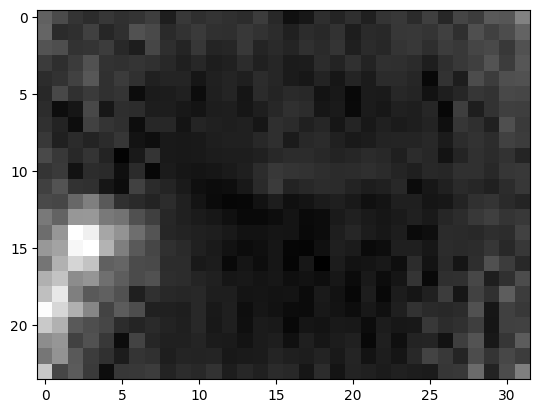

1/1 [==============================] - 0s 27ms/step
2


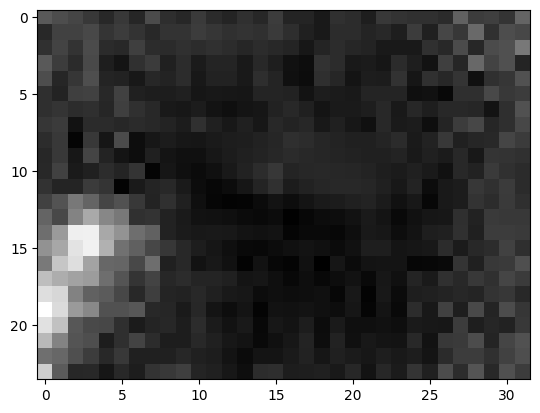

1/1 [==============================] - 0s 28ms/step
2


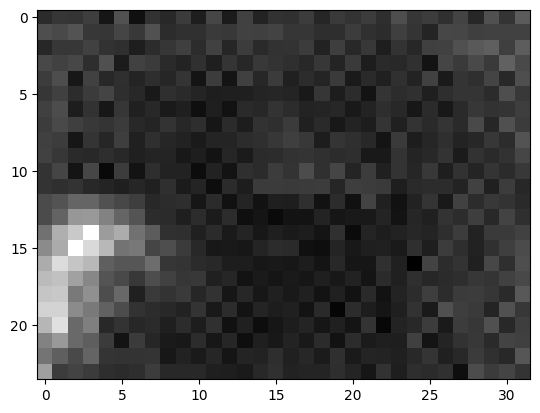

1/1 [==============================] - 0s 27ms/step
2


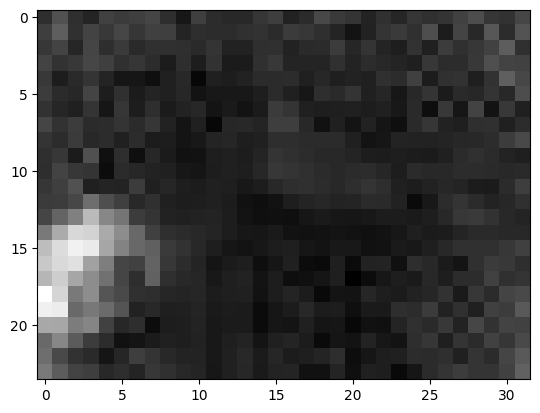

1/1 [==============================] - 0s 28ms/step
2


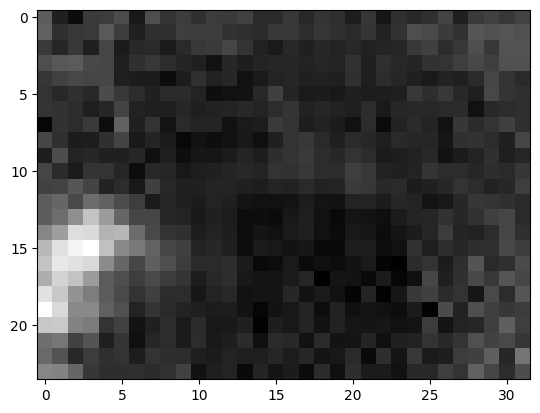

1/1 [==============================] - 0s 27ms/step
2


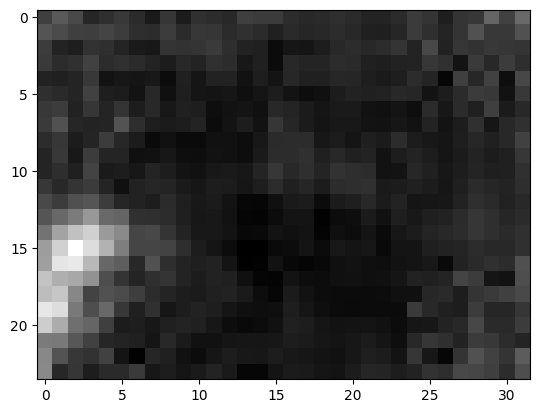

1/1 [==============================] - 0s 27ms/step
2


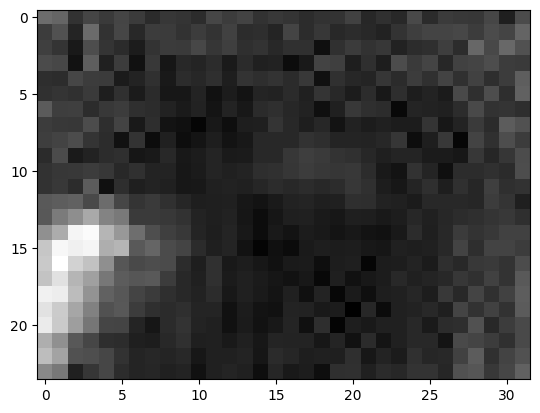

1/1 [==============================] - 0s 27ms/step
2


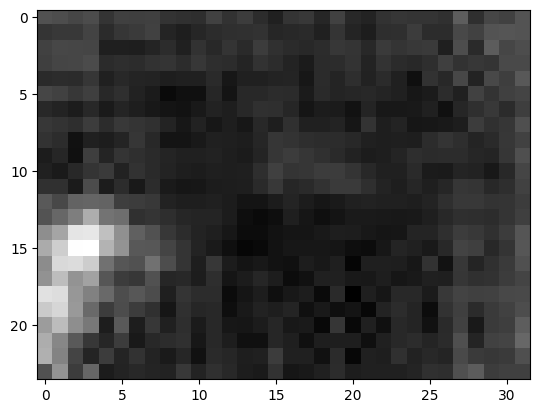

1/1 [==============================] - 0s 27ms/step
2


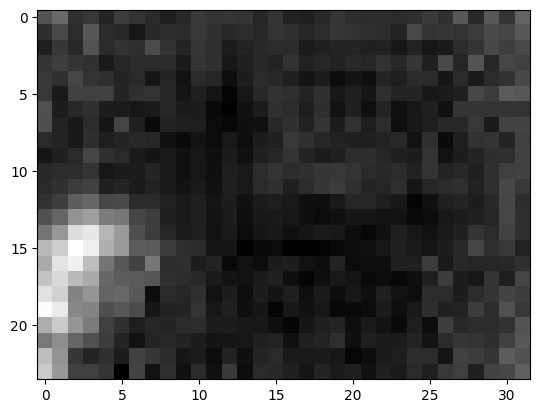

1/1 [==============================] - 0s 28ms/step
2


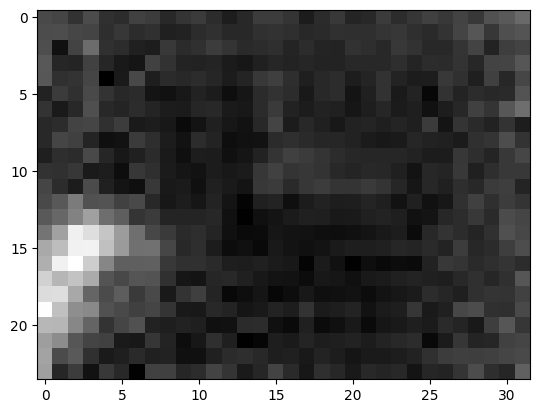

1/1 [==============================] - 0s 28ms/step
2


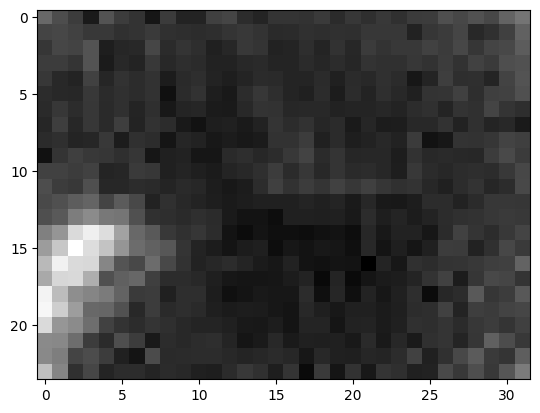

1/1 [==============================] - 0s 28ms/step
2


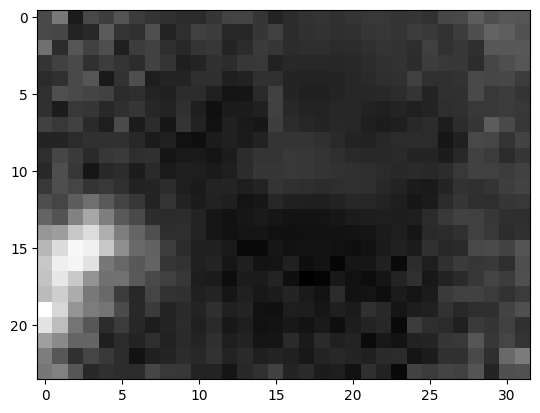

1/1 [==============================] - 0s 28ms/step
2


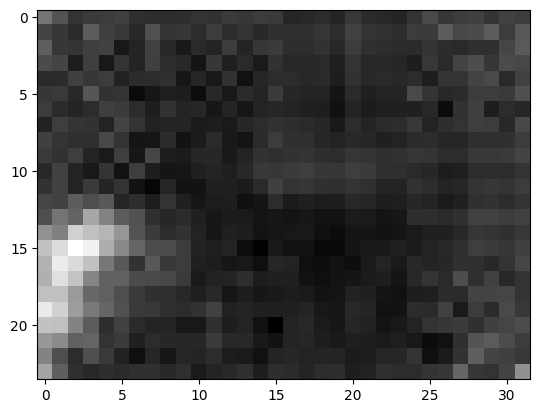

1/1 [==============================] - 0s 29ms/step
2


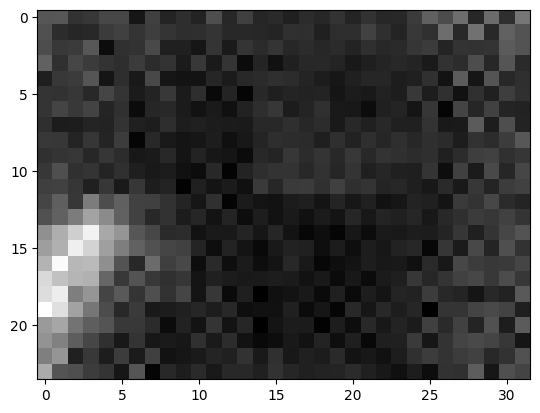

1/1 [==============================] - 0s 28ms/step
2


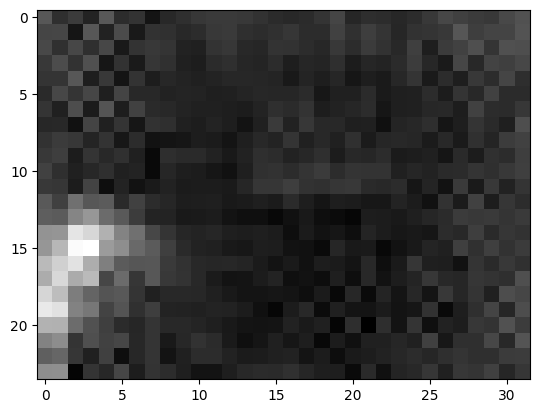

1/1 [==============================] - 0s 28ms/step
2


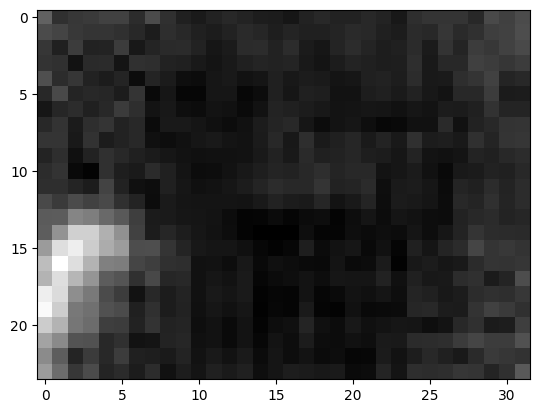

1/1 [==============================] - 0s 28ms/step
2


In [ ]:
# print(test_dataset[0].shape)
# print(test_dataset[0].shape)
# print(test_dataset[0].reshape(1, 24, 32, 1).shape)
# plt.imshow(test_dataset[0])
train_dataset = origin_images[:11949]
train_number_labels = number_labels[:11949]
train_target_image = target_images[:11949]
test_dataset = origin_images[11949:]
test_number_labels = number_labels[11949:]
test_target_image = target_images[11949:]

for i in range(20):
    plt.imshow(test_dataset[i], cmap='gray')
    plt.show()
    res = model2.predict(test_dataset[i].reshape(1, 24, 32, 1))
    print(res[0].argmax())

In [ ]:
import tensorflow as tf
from tensorflow_model_optimization.sparsity import keras as sparsity
from tensorflow_model_optimization.sparsity.keras import UpdatePruningStep

# train_dataset, train_number_labels,

# 초기 모델 로드
model = tf.keras.models.load_model('./v2_1.h5')

# 프루닝 설정
epochs = 32
batch_size = 128
num_train_samples = origin_images.shape[0]
end_step = np.ceil(num_train_samples / batch_size).astype(np.int32) * epochs
pruning_params = {
    'pruning_schedule': sparsity.PolynomialDecay(initial_sparsity=0.50,
                                                 final_sparsity=0.80,
                                                 begin_step=0,
                                                 end_step=end_step)
}

# 모델에 프루닝 래퍼 적용
model_for_pruning = sparsity.prune_low_magnitude(model, **pruning_params)

# 프루닝 모델 컴파일 및 훈련
model_for_pruning.compile(optimizer='adam',
                          loss=tf.keras.losses.categorical_crossentropy,
                          metrics=['accuracy'])

callbacks = [
    UpdatePruningStep()
]

model_for_pruning.fit(origin_images, number_labels, epochs=epochs, callbacks=callbacks)

# 프루닝 제거 및 최종 모델 저장
final_model = sparsity.strip_pruning(model_for_pruning)
final_model.save('pruned_model.h5')


Epoch 1/200
415/415 [==============================] - 6s 8ms/step - loss: 0.3393 - accuracy: 0.8644
Epoch 2/200
415/415 [==============================] - 3s 8ms/step - loss: 0.2951 - accuracy: 0.8823
Epoch 3/200
415/415 [==============================] - 3s 8ms/step - loss: 0.2989 - accuracy: 0.8823
Epoch 4/200
415/415 [==============================] - 3s 8ms/step - loss: 0.2992 - accuracy: 0.8823
Epoch 5/200
415/415 [==============================] - 3s 8ms/step - loss: 0.2886 - accuracy: 0.8891
Epoch 6/200
415/415 [==============================] - 3s 8ms/step - loss: 0.2806 - accuracy: 0.8936
Epoch 7/200
415/415 [==============================] - 3s 8ms/step - loss: 0.2904 - accuracy: 0.8866
Epoch 8/200
415/415 [==============================] - 3s 8ms/step - loss: 0.2839 - accuracy: 0.8917
Epoch 9/200
415/415 [==============================] - 3s 8ms/step - loss: 0.2846 - accuracy: 0.8900
Epoch 10/200
415/415 [==============================] - 3s 8ms/step - loss: 0.2790 - accura

In [ ]:
final_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 24, 32, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 24, 32, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 32, 16)        2320      
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 32, 16)        2320      
                                                                 
 global_average_pooling2d (  (None, 16)                0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               2176      
                                                             

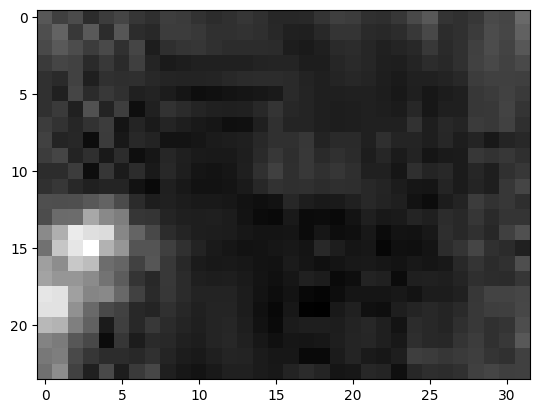

1/1 [==============================] - 0s 67ms/step
2


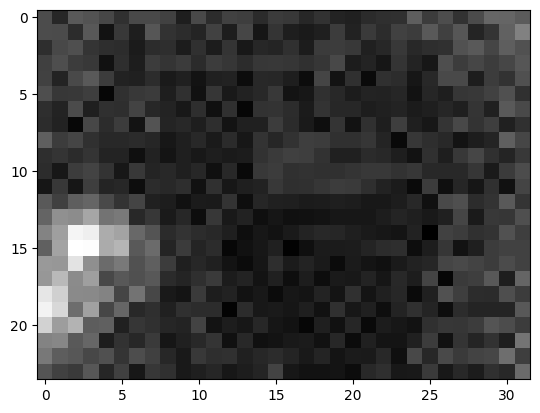

1/1 [==============================] - 0s 27ms/step
2


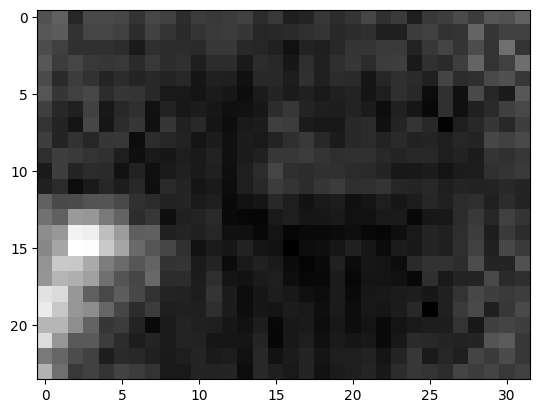

1/1 [==============================] - 0s 27ms/step
2


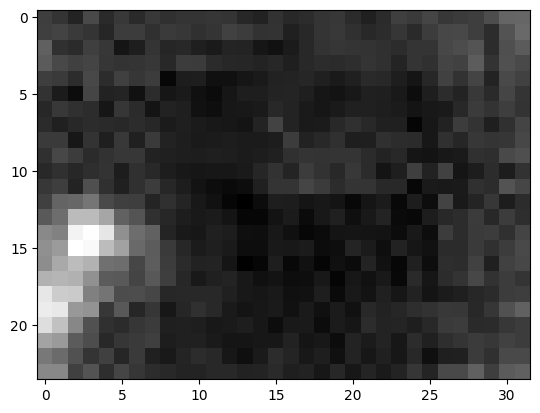

1/1 [==============================] - 0s 27ms/step
2


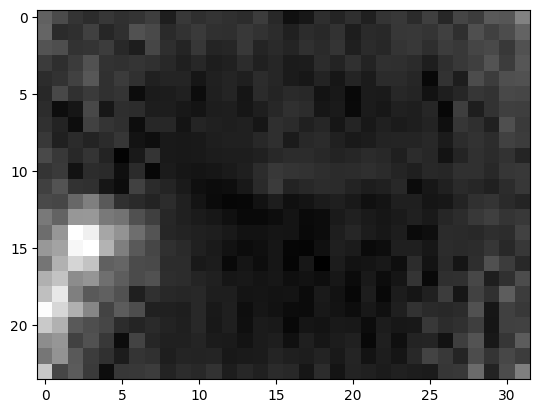

1/1 [==============================] - 0s 27ms/step
2


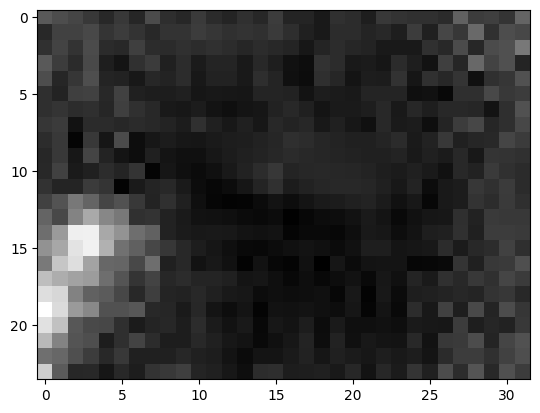

1/1 [==============================] - 0s 27ms/step
2


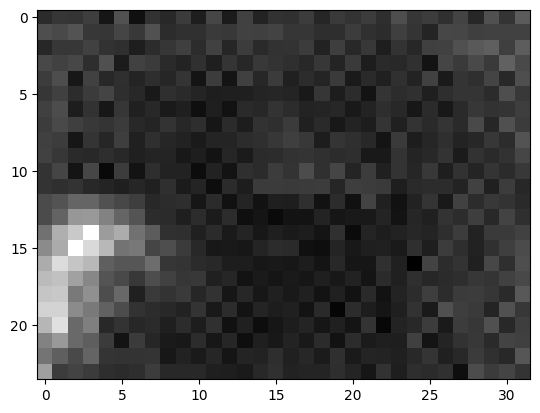

1/1 [==============================] - 0s 27ms/step
2


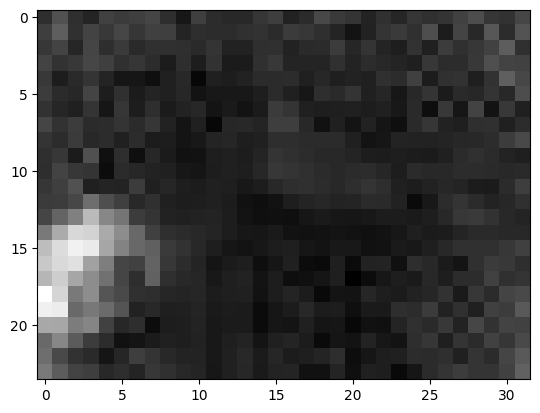

1/1 [==============================] - 0s 27ms/step
2


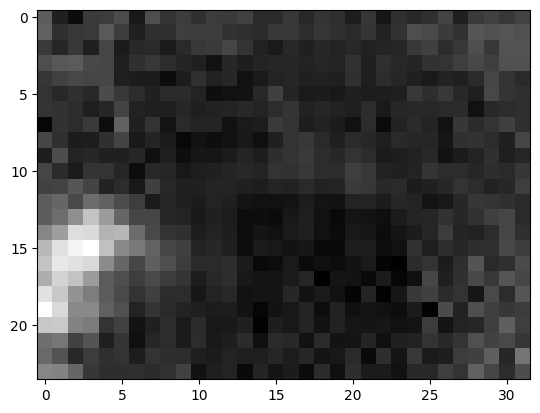

1/1 [==============================] - 0s 27ms/step
2


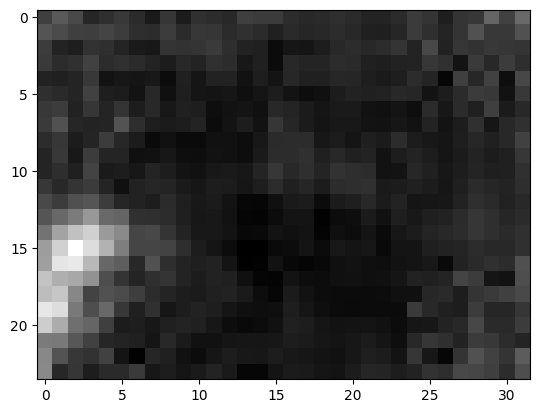

1/1 [==============================] - 0s 27ms/step
2


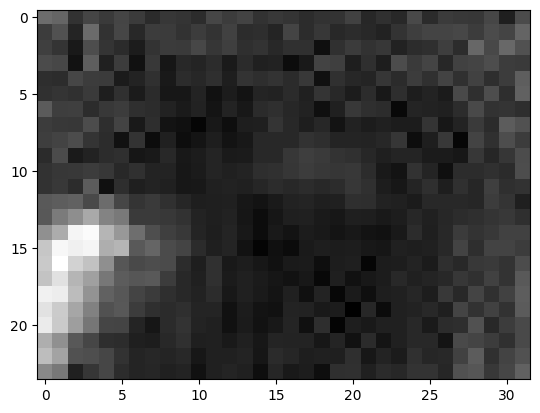

1/1 [==============================] - 0s 27ms/step
2


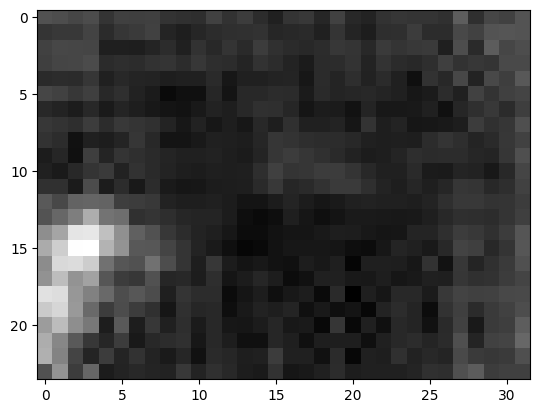

1/1 [==============================] - 0s 27ms/step
2


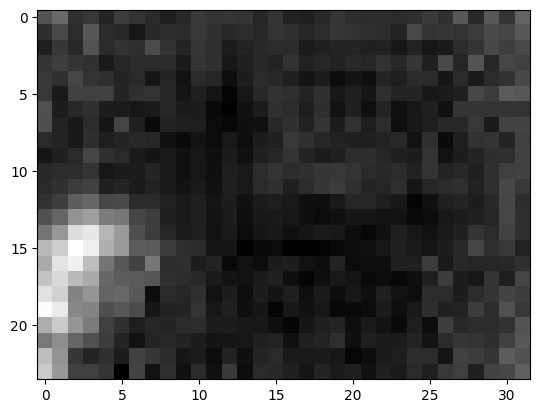

1/1 [==============================] - 0s 27ms/step
2


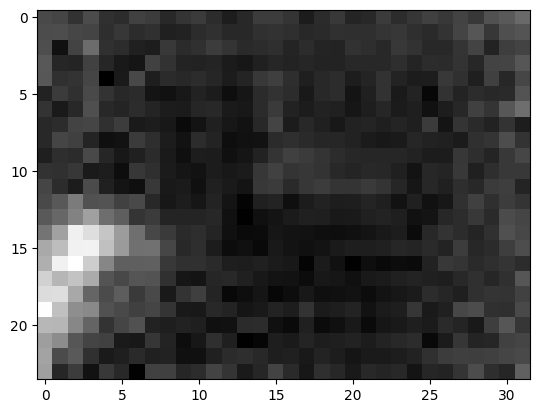

1/1 [==============================] - 0s 27ms/step
2


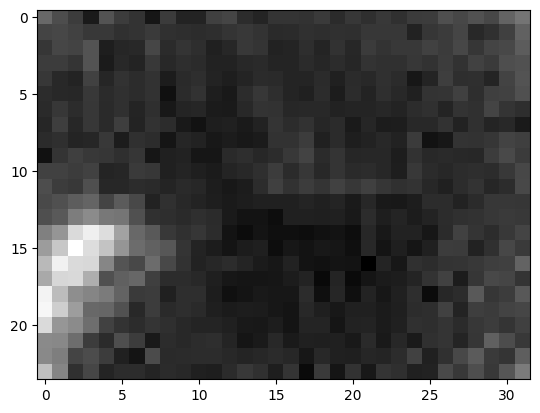

1/1 [==============================] - 0s 27ms/step
2


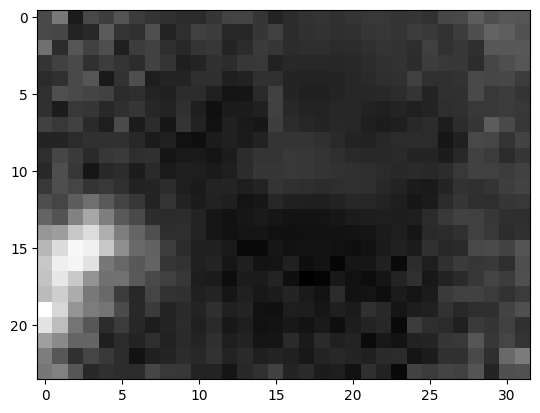

1/1 [==============================] - 0s 27ms/step
2


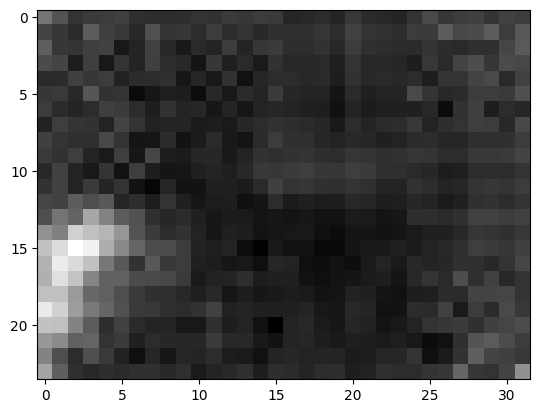

1/1 [==============================] - 0s 27ms/step
2


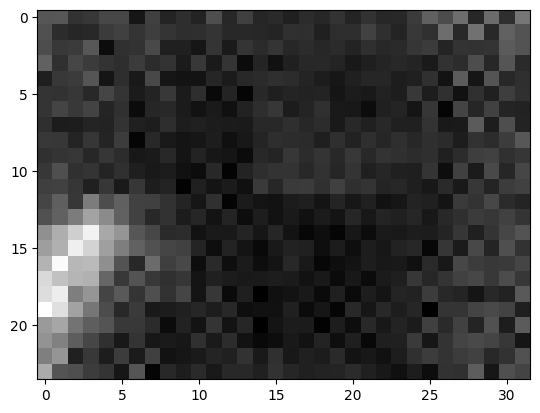

1/1 [==============================] - 0s 27ms/step
2


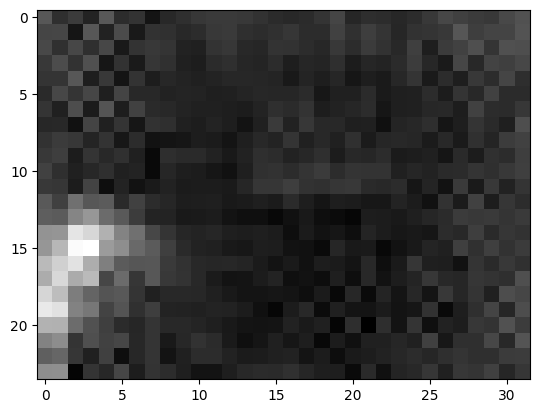

1/1 [==============================] - 0s 27ms/step
2


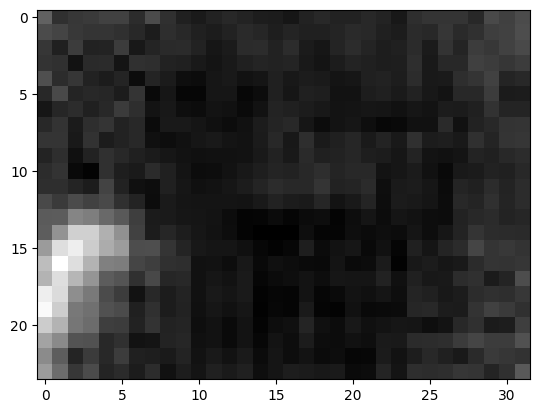

1/1 [==============================] - 0s 27ms/step
2


In [ ]:
for i in range(20):
    plt.imshow(test_dataset[i], cmap='gray')
    plt.show()
    res = final_model.predict(test_dataset[i].reshape(1, 24, 32, 1))
    print(res[0].argmax())

In [ ]:
batch_size = 32
train_dataset_tf = tf.data.Dataset.from_tensor_slices(test_dataset)
# train_dataset을 배치로 만듦
batched_train_dataset = train_dataset_tf.batch(batch_size)

In [ ]:
import tensorflow as tf

# 기존 모델 로드
model = tf.keras.models.load_model('pruned_model.h5')

# 대표 데이터셋을 준비하는 함수
def representative_data_gen():
    for input_value in batched_train_dataset.take(100):
        yield [input_value]

# 훈련 데이터셋을 로드하고 배치 처리
# 여기서 test_dataset와 batch_size는 적절한 값으로 설정해야 합니다.
batched_train_dataset = tf.data.Dataset.from_tensor_slices(test_dataset).batch(batch_size)
batched_train_dataset = batched_train_dataset.map(lambda x: tf.cast(x, tf.float32))

# TFLite 변환기 설정
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen

# 모든 연산을 float32로 제한
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS]

# 입력과 출력을 float32로 설정
converter.inference_input_type = tf.float32
converter.inference_output_type = tf.float32

# 모델을 TFLite 모델로 변환
tflite_quant_model = converter.convert()

# TFLite 모델 저장
with open('quantized_model.tflite', 'wb') as f:
    f.write(tflite_quant_model)


INFO:tensorflow:Assets written to: /tmp/tmpfj921g8f/assets


INFO:tensorflow:Assets written to: /tmp/tmpfj921g8f/assets
2023-12-05 12:46:00.219544: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-12-05 12:46:00.219572: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-12-05 12:46:00.219762: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpfj921g8f
2023-12-05 12:46:00.220582: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2023-12-05 12:46:00.220595: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /tmp/tmpfj921g8f
2023-12-05 12:46:00.223397: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2023-12-05 12:46:00.243309: I tensorflow/cc/saved_model/loader.cc:215] Running initialization op on SavedModel bundle at path: /tmp/tmpfj921g8f
2023-12-05 12:46:00.250565: I tensorflow/cc/saved_model/loader.cc:314] SavedModel